In [1]:
import numpy as np
from matplotlib import pyplot as plt

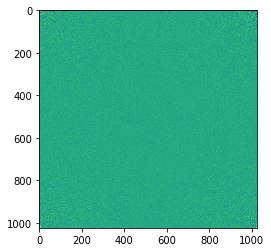

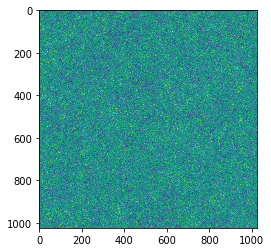

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


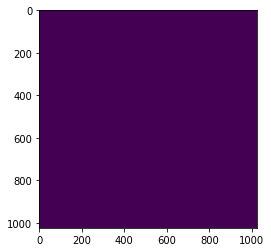

In [2]:
np.random.seed(42)
n = -1
N = 1024
df = np.zeros((N,N),dtype=complex)

for j in range((N//2)+1):
    # Determining the value of k_y 
    k_y = j*2*np.pi/N
    for i in range(N):
        # Determining the value of k_x and sigma_x
        if i <= (N//2):
            k_x = (i)*2*np.pi/N
        else:
            k_x = (-N+i)*2*np.pi/N
        # Avoid dividing by 0
        if i != 0 or j != 0:
            sig = ((k_x**2+k_y**2)**0.5)**(n/2)
        else: 
            sig = 0
        # Drawing a random number from normal distrib 
        df[j][i] = np.random.normal(0,sig)+ 1j*np.random.normal(0,sig)

df[0][0] = 0
df[0][N//2] = (df[0][N//2].real)**2
df[N//2][0] = (df[N//2][0].real)**2
df[N//2][N//2] = (df[N//2][N//2].real)**2

for j in range((N//2)+1):
    for i in range(N):
        df[-j][-i]= df[j][i].conjugate()

plt.imshow((df.real))
plt.show()
df = np.fft.ifft2(df)
plt.imshow((df.real))
plt.show()
print(df.imag)
plt.imshow(df.imag)

In [86]:
df = np.fft.fftshift(df)
print(df)

[[-0.23492266+0.3215912j  -0.24635561+0.21758342j -0.07782153+0.83020709j
  ... -0.65740351-0.09212934j -0.23096485+0.06986269j
  -0.42252941-0.05343419j]
 [-0.15260177-0.60034649j -1.22508069+0.26726019j -0.8490673 -1.15604267j
  ... -0.0210063 +0.73522292j -0.17098142-0.24629241j
  -0.72570845+1.3801327j ]
 [ 0.033274  -1.07139945j  0.20444478-0.08947981j  0.92506693+0.26568806j
  ... -0.51013766-0.9606012j   0.64914588-1.55657559j
  -0.77655225-0.39339521j]
 ...
 [-0.77655225-0.39339521j  0.64914588-1.55657559j -0.51013766-0.9606012j
  ...  0.92506693+0.26568806j  0.20444478-0.08947981j
   0.033274  -1.07139945j]
 [-0.72570845+1.3801327j  -0.17098142-0.24629241j -0.0210063 +0.73522292j
  ... -0.8490673 -1.15604267j -1.22508069+0.26726019j
  -0.15260177-0.60034649j]
 [-0.42252941-0.05343419j -0.23096485+0.06986269j -0.65740351-0.09212934j
  ... -0.07782153+0.83020709j -0.24635561+0.21758342j
  -0.23492266+0.3215912j ]]


In [184]:
x = np.array(([0,1,2,3,4,3,2,1],
              [10,11,12,13,14,13,12,11],
              [20,21,22,23,24,23,22,21],
              [30,31,32,33,34,33,32,31],
              [40,41,42,43,44,43,42,41],
              [0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0]))
print(x)
#for i in range(len(x)//2):
#    x[0][-i] = x[0][i]
#print('Shift x axis')
#print(x)
for j in range((len(x)//2)+1):
    for i in range(len(x[0])):
        x[-j][-i]=x[j][i]*-1
print('Conjugate')
print(x)        
x[0][len(x)//2] = 4
x[len(x)//2][len(x)//2] = 44
x[len(x)//2][0] = 40
print('Fixed 3 points')
print(x)

[[ 0  1  2  3  4  3  2  1]
 [10 11 12 13 14 13 12 11]
 [20 21 22 23 24 23 22 21]
 [30 31 32 33 34 33 32 31]
 [40 41 42 43 44 43 42 41]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
Conjugate
[[  0   1   2   3  -4  -3  -2  -1]
 [ 10  11  12  13  14  13  12  11]
 [ 20  21  22  23  24  23  22  21]
 [ 30  31  32  33  34  33  32  31]
 [-40  41  42  43 -44 -43 -42 -41]
 [-30 -31 -32 -33 -34 -33 -32 -31]
 [-20 -21 -22 -23 -24 -23 -22 -21]
 [-10 -11 -12 -13 -14 -13 -12 -11]]
Fixed 3 points
[[  0   1   2   3   4  -3  -2  -1]
 [ 10  11  12  13  14  13  12  11]
 [ 20  21  22  23  24  23  22  21]
 [ 30  31  32  33  34  33  32  31]
 [ 40  41  42  43  44 -43 -42 -41]
 [-30 -31 -32 -33 -34 -33 -32 -31]
 [-20 -21 -22 -23 -24 -23 -22 -21]
 [-10 -11 -12 -13 -14 -13 -12 -11]]
